In [77]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.stats as st

import seaborn as sns
import seaborn.objects as so

In [78]:
#HYPOTHESIS

#1) Misha
    #HYPOTHESIS 1A - (MISHA)
        #HYBRID CANNABIS TYPES HAVE MORE HAPPY EFFECTS COMPARED TO OTHER TYPES OF CANNABIS (USING EFFECT 1)
    #HYPOTHESIS 1B - (MISHA)
        #there is a significant difference in rating when comparing different types of cannabis
    #HYPOTHESIS 1C - (MISHA)
        #the main effect experienced by consuming any type of cannabis is “relaxed”
    


#2) Kim
    #Does sweet profile cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating
    
#3) #Latti
    #Does the location of the breeder impact the rating? Does the location impact the type that is grown?


#4)  Tacha
    #Is there a significant difference in the effects experienced by consumers when they rate the same cannabis type differently? 
    #(Use data to get the ratings of the cannabis type and analyze the effects reported to see if they are consistent.) Do users feel different effects when they use the same type of cannabis(yes). How does this affect how they rate it? Ex: Hybrid- 13 users said it made them aroused. What is the average rating reported by those 13 people? Repeat for a few more effects in Hybrid, Sativa, then Indica.
    #Happiness

In [79]:
#Get CSV data
Original_Data = pd.read_csv("new_cannabis_data.csv",encoding='latin-1')
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN


In [80]:
#Split Effects column into different columns
Original_Data.Effects.str.split(",",expand=True)

,0,1,2,3,4
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2346,Happy,Uplifted,Relaxed,Euphoric,Energetic
2347,Relaxed,Happy,Euphoric,Uplifted,Sleepy
2348,Relaxed,Sleepy,Talkative,Euphoric,Happy
2349,Relaxed,Sleepy,Euphoric,Happy,Hungry


In [81]:
#Create a data frame for the different effects and name the column titles
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["effect_1", "effect_2", "effect_3", "effect_4", "effect_5"]
effects.head()

,effect_1,effect_2,effect_3,effect_4,effect_5
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN


In [82]:
#Create a data frame for the different flavors and name the column titles
flavors = Original_Data.Flavor.str.split(",",expand=True)
flavors.columns=["flavor_1", "flavor_2", "flavor_3", "flavor_4"]
flavors.head()

,flavor_1,flavor_2,flavor_3,flavor_4
0,Spicy_Herbal,Sage,Woody,None
1,Earthy,Sweet,Citrus,None
2,Apricot,Citrus,Grapefruit,None
3,Citrus,Earthy,Orange,None
4,NaN,NaN,NaN,NaN


In [83]:
#Get the info for the flavors
flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flavor_1  2195 non-null   object
 1   flavor_2  2161 non-null   object
 2   flavor_3  2117 non-null   object
 3   flavor_4  43 non-null     object
dtypes: object(4)
memory usage: 73.6+ KB


In [84]:
#Add the new columns for effects and falvors to the original Data 
pd.concat([Original_Data, effects, flavors], axis=1)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy_Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",A Greener Today's Dankczar,NaN,Happy,Uplifted,Relaxed,Euphoric,Energetic,Earthy,Woody,Pine,None
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",3rd Gen Family and Terp Hogz,NaN,Relaxed,Happy,Euphoric,Uplifted,Sleepy,Sweet,Berry,Grape,None
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy_Herbal",Ripper Seeds,NaN,Relaxed,Sleepy,Talkative,Euphoric,Happy,Earthy,Sweet,Spicy_Herbal,None
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",NaN,NaN,Relaxed,Sleepy,Euphoric,Happy,Hungry,Sweet,Earthy,Pungent,None


In [85]:
#Clean original data and combined data frame of the flavors and effects into the original Data Frame
OD2=pd.concat([Original_Data, effects, flavors], axis=1)
OD2.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy_Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy_Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
#Get info for new Data Frame
#flavor_4 only has 43 non-null datapoints and location has 614. 
OD2["num_effects"]=OD2.Effects.str.count(",")+1
OD2["num_flavors"]=OD2.Flavor.str.count(",")+1
OD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2264 non-null   object 
 4   Flavor       2195 non-null   object 
 5   Breeders     1165 non-null   object 
 6   LOCATION     614 non-null    object 
 7   effect_1     2264 non-null   object 
 8   effect_2     2254 non-null   object 
 9   effect_3     2239 non-null   object 
 10  effect_4     2212 non-null   object 
 11  effect_5     2180 non-null   object 
 12  flavor_1     2195 non-null   object 
 13  flavor_2     2161 non-null   object 
 14  flavor_3     2117 non-null   object 
 15  flavor_4     43 non-null     object 
 16  num_effects  2264 non-null   float64
 17  num_flavors  2195 non-null   float64
dtypes: float64(3), object(15)
memory usage: 330.7+ K

In [87]:
#Get value counts for effect 1 on new data frame
OD2["effect_1"].value_counts()

effect_1
Relaxed      825
Happy        476
Euphoric     249
Uplifted     244
Sleepy        89
Creative      80
Energetic     74
Talkative     55
Focused       53
Aroused       38
Hungry        36
Tingly        32
Giggly        12
Dry            1
Name: count, dtype: int64

In [88]:
#Flavor 4 only has 43 non-null values therefore they need to be removed
#Create new data frame after droping flavor 4
OD2=OD2.drop(columns=["flavor_4"])
OD3=OD2.dropna(how="any")
OD3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 2341
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       501 non-null    object 
 1   Type         501 non-null    object 
 2   Rating       501 non-null    float64
 3   Effects      501 non-null    object 
 4   Flavor       501 non-null    object 
 5   Breeders     501 non-null    object 
 6   LOCATION     501 non-null    object 
 7   effect_1     501 non-null    object 
 8   effect_2     501 non-null    object 
 9   effect_3     501 non-null    object 
 10  effect_4     501 non-null    object 
 11  effect_5     501 non-null    object 
 12  flavor_1     501 non-null    object 
 13  flavor_2     501 non-null    object 
 14  flavor_3     501 non-null    object 
 15  num_effects  501 non-null    float64
 16  num_flavors  501 non-null    float64
dtypes: float64(3), object(14)
memory usage: 70.5+ KB


In [89]:
#We droped 12% of null values so 88% of our data is valid
#(2351-2053)/2351

In [90]:
#fIND TOTAL VALUES FOR EACH TYPE OF CANNABIS
OD3.Type.value_counts()

Type
hybrid    236
indica    157
sativa    108
Name: count, dtype: int64

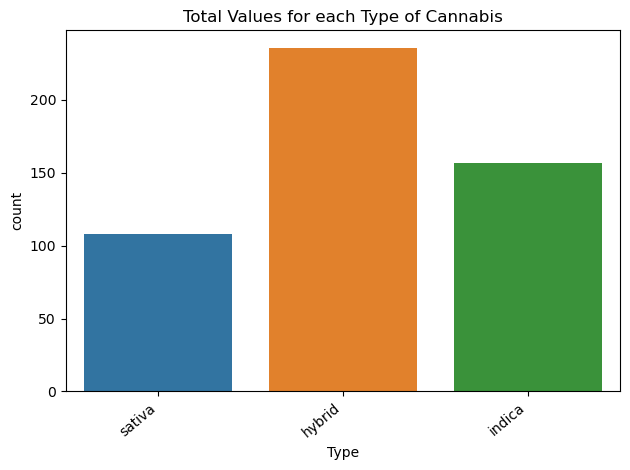

In [91]:
#TOTAL COUNT OF VALUES BY TYPE
count_types_plot = sns.countplot(x="Type", data=OD3)

count_types_plot.set_xticklabels(count_types_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Total Values for each Type of Cannabis")
plt.tight_layout()
plt.show()

In [92]:
#HYPOTHESIS 1A - (MISHA)
#HYBRID CANNABIS TYPES HAVE MORE HAPPY EFFECTS COMPARED TO OTHER TYPES OF CANNABIS (USING EFFECT 1)

In [93]:
#Find average rating for each
OD3.groupby("Type").Rating.mean()

Type
hybrid    4.398305
indica    4.455414
sativa    4.435185
Name: Rating, dtype: float64

In [94]:
#COUNT FOR EACH EFFECT FOR EFFECT1 BY TYPE
OD3.groupby(["Type", "effect_1"]).size()

Type    effect_1 
hybrid  Aroused        4
        Creative       6
        Energetic      4
        Euphoric      34
        Focused        7
        Happy         63
        Hungry         2
        Relaxed       74
        Sleepy         2
        Talkative      7
        Tingly         4
        Uplifted      29
indica  Aroused        2
        Creative       2
        Euphoric      15
        Focused        1
        Giggly         1
        Happy          8
        Hungry         1
        Relaxed      112
        Sleepy        10
        Talkative      1
        Uplifted       4
sativa  Aroused        3
        Creative       5
        Energetic      6
        Euphoric      21
        Focused        4
        Giggly         1
        Happy         31
        Hungry         1
        Relaxed        9
        Sleepy         1
        Talkative      2
        Uplifted      24
dtype: int64

In [95]:
#Create New Data Frame with Type and Effects (USING EFFECT_1)
t_e1=OD3.groupby(["Type", "effect_1"]).size()

h11_df=pd.DataFrame(t_e1)
h11_df.head

<bound method NDFrame.head of                     0
Type   effect_1      
hybrid Aroused      4
       Creative     6
       Energetic    4
       Euphoric    34
       Focused      7
       Happy       63
       Hungry       2
       Relaxed     74
       Sleepy       2
       Talkative    7
       Tingly       4
       Uplifted    29
indica Aroused      2
       Creative     2
       Euphoric    15
       Focused      1
       Giggly       1
       Happy        8
       Hungry       1
       Relaxed    112
       Sleepy      10
       Talkative    1
       Uplifted     4
sativa Aroused      3
       Creative     5
       Energetic    6
       Euphoric    21
       Focused      4
       Giggly       1
       Happy       31
       Hungry       1
       Relaxed      9
       Sleepy       1
       Talkative    2
       Uplifted    24>

In [96]:
#Create Donut/Pie Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)

In [97]:
#HYBRID-locate Hybrid from Data Frame Above
hybrid_e1=h11_df.loc["hybrid"]
hybrid_e1

,0
effect_1,
Aroused,4
Creative,6
Energetic,4
Euphoric,34
Focused,7
Happy,63
Hungry,2
Relaxed,74
Sleepy,2


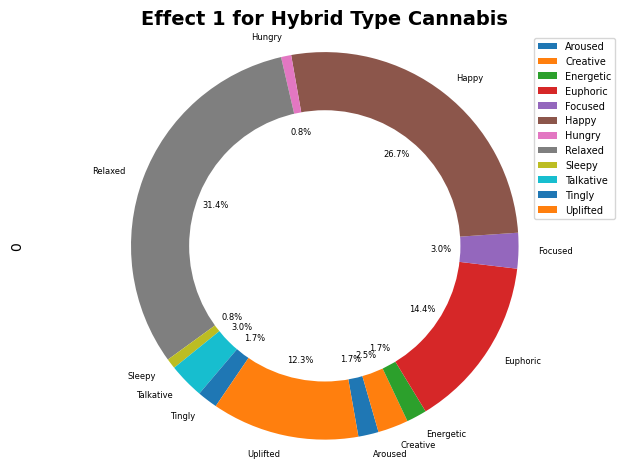

In [98]:
#HYBRID
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
hybrid_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=6)

plt.title("Effect 1 for Hybrid Type Cannabis",fontweight="bold",fontsize=14)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='upper right',fontsize=7)

# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [99]:
#INDICA DATA FRAME -locate Indica from Data Frame Above
indica_e1=h11_df.loc["indica"]
indica_e1

,0
effect_1,
Aroused,2
Creative,2
Euphoric,15
Focused,1
Giggly,1
Happy,8
Hungry,1
Relaxed,112
Sleepy,10


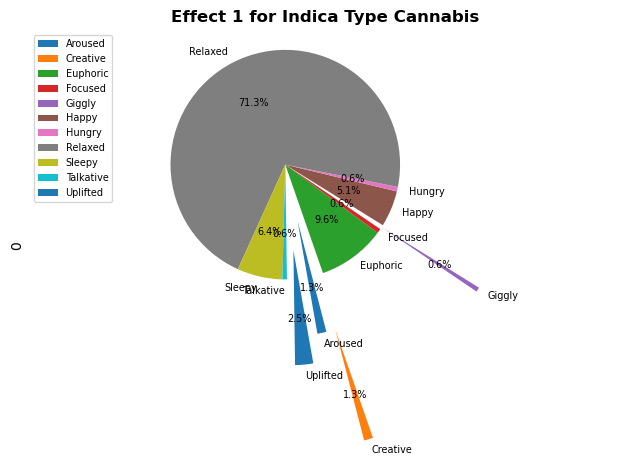

In [100]:
#INDICA
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
explode = (0.5,1.5,0,0,1,0,0,0,0,0,0.75)

indica_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,explode=explode,fontsize=7)



plt.title("Effect 1 for Indica Type Cannabis",fontweight="bold",fontsize=12)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='upper left',fontsize=7)


# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [101]:
#SATIVA DATA FRAME - locate Sativa from Data Frame Above
sativa_e1=h11_df.loc["sativa"]
sativa_e1

,0
effect_1,
Aroused,3
Creative,5
Energetic,6
Euphoric,21
Focused,4
Giggly,1
Happy,31
Hungry,1
Relaxed,9


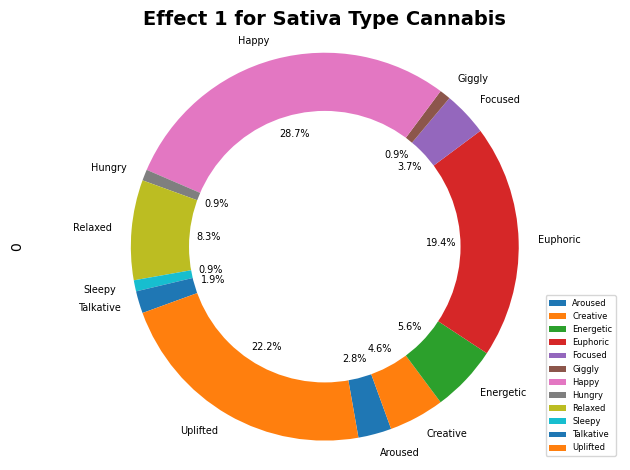

In [102]:
#SATIVA
#Create Donut Charts for each type of cannabies to display how many "Happy" Effects they each have (Use Effect 1)
sativa_e1.plot(kind="pie",autopct="%1.1f%%",subplots=True,startangle=1000,fontsize=7)

plt.title("Effect 1 for Sativa Type Cannabis",fontweight="bold",fontsize=14)
plt.axis("equal")
plt.tight_layout()
#plt.figure(figsize=(5,50))
plt.legend(loc='lower right',fontsize=6)

# draw circle
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# step 4, is to show or save it
plt.show()

In [103]:
#Open OD3 To see column names for next plots
#OD3.head()

In [104]:
#HYPOTHESIS 1B - (MISHA)
#there is a significant difference in rating when comparing different types of cannabis

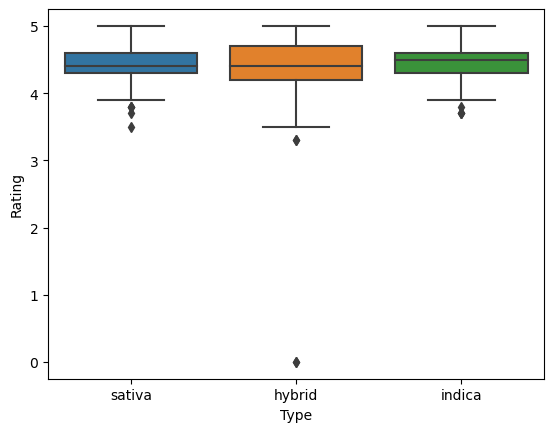

In [105]:
#Create a box plot with types and ratings
sns.boxplot(data=OD3,x="Type",y="Rating")
plt.show()

In [106]:
#Get statistical values (mean and variance) for all three types according to their rating
OD3.groupby(["Type"]).agg({"Rating":["mean","var"]})

Rating          
            mean       var
Type                      
hybrid  4.398305  0.257955
indica  4.455414  0.085307
sativa  4.435185  0.097442

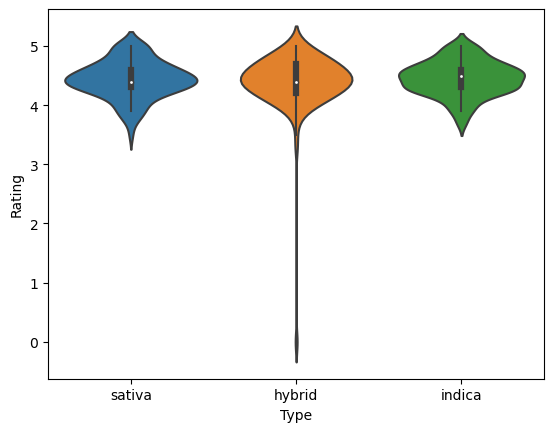

In [107]:
#Create a vialin Chart to display if there is any significant difference in rating
violini=sns.violinplot(data=OD3,x="Type",y="Rating",fontsize=5,legend='auto')
plt.show()

In [108]:
#Calculate P values to compare all three
#First separate ratings by type and then compare them to each other

grp0=OD3.loc[OD3.Type=="sativa","Rating"]
grp1=OD3.loc[OD3.Type=="hybrid","Rating"]
grp2=OD3.loc[OD3.Type=="indica","Rating"]

In [109]:
#Compare Sativa vs Hybrid
#P Value Greater than 0.05 means there is no statistical signifcance 
st.ttest_ind(grp0,grp1)

TtestResult(statistic=0.6965064730155417, pvalue=0.48658481052453917, df=342.0)

In [110]:
#Compare Sativa vs Indica
#P Value Greater than 0.05 means there is no statistical signifcance 

st.ttest_ind(grp0,grp2)

TtestResult(statistic=-0.5386418658960523, pvalue=0.5905896023937005, df=263.0)

In [111]:
#Compare Hybrid vs Indica
#P Value Greater than 0.05 means there is no statistical signifcance 

st.ttest_ind(grp1,grp2)

TtestResult(statistic=-1.2752629761607839, pvalue=0.2029733692729021, df=391.0)

In [112]:
#Compare all three and get P-Value
#P Value Greater than 0.05 means there is no statistical signifcance 
st.f_oneway(grp0,grp1,grp2)

F_onewayResult(statistic=0.9571357342086968, pvalue=0.3846963878282835)

In [113]:
#HYPOTHESIS 1C - (MISHA)
#the main effect experienced by consuming any type of cannabis is “relaxed”

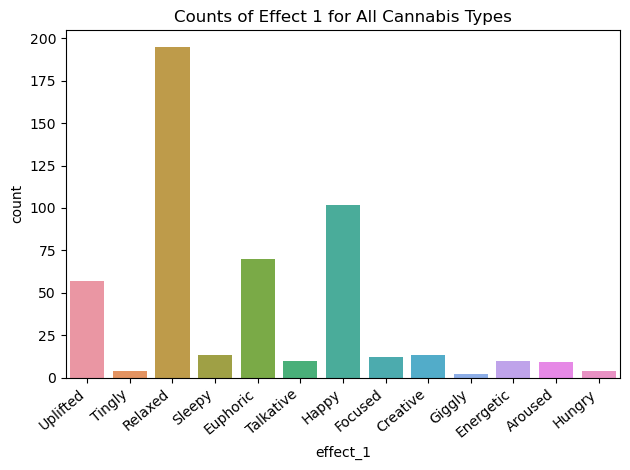

In [114]:
#TOTAL COUNT OF EFFECTS reported on EFFECT 1-Combining all Types
count_plot = sns.countplot(x="effect_1", data=OD3)

count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Counts of Effect 1 for All Cannabis Types")
plt.tight_layout()
plt.show()

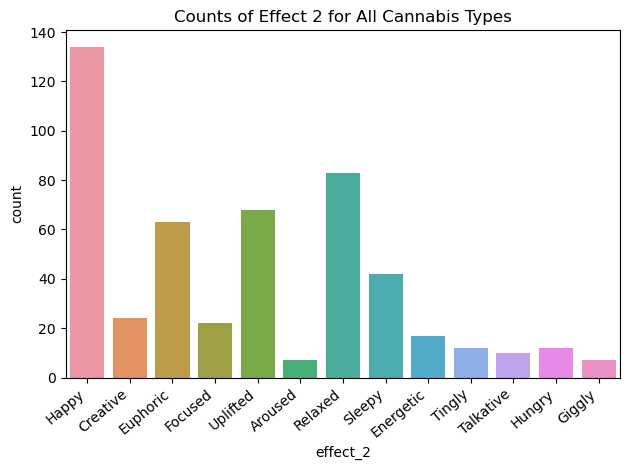

In [144]:
#TOTAL COUNT OF EFFECTS - EFFECT 2
count_plot = sns.countplot(x="effect_2", data=OD3)

count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Counts of Effect 2 for All Cannabis Types")
plt.tight_layout()
plt.show()

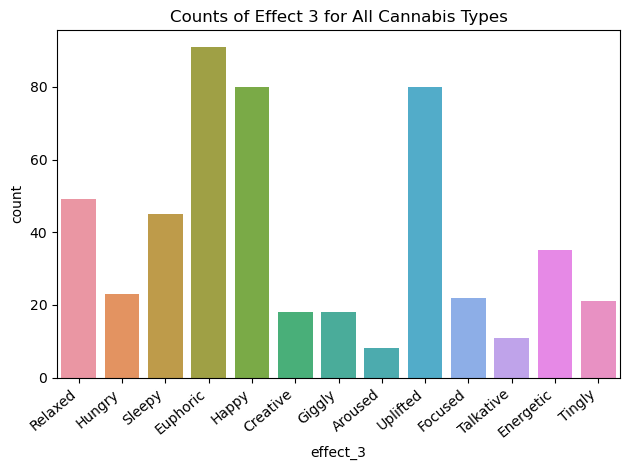

In [145]:
#TOTAL COUNT OF EFFECTS - EFFECT 3
count_plot = sns.countplot(x="effect_3", data=OD3)

count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Counts of Effect 3 for All Cannabis Types")
plt.tight_layout()
plt.show()

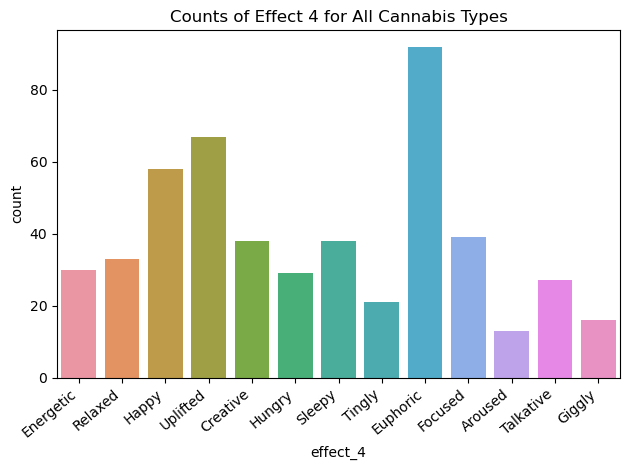

In [146]:
#TOTAL COUNT OF EFFECTS - EFFECT 4
count_plot = sns.countplot(x="effect_4", data=OD3)

count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Counts of Effect 4 for All Cannabis Types")
plt.tight_layout()
plt.show()

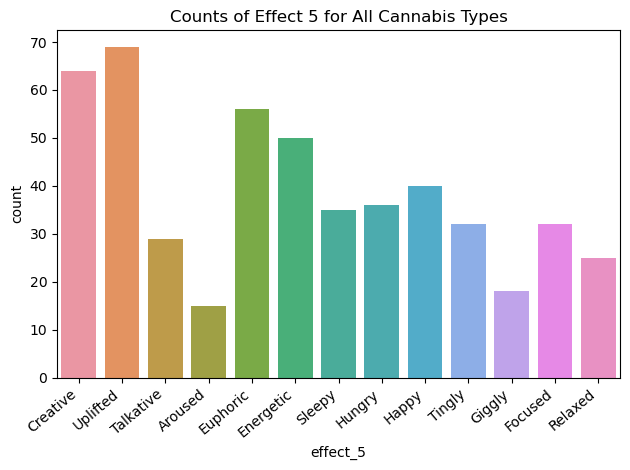

In [147]:
#TOTAL COUNT OF EFFECTS - EFFECT 5
count_plot = sns.countplot(x="effect_5", data=OD3)

count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Counts of Effect 5 for All Cannabis Types")
plt.tight_layout()
plt.show()

In [148]:
#2) Kim
    #What flavors of cannabis have a higher rating?
        #What Flavor had the Max Rating
        #What Flavor has the min Rating
        #What Flavor has the median Rating

In [184]:
#Group data by Rating then count the number of flavor_1 per Rating
OD3.groupby(["Rating", "flavor_1"]).size()

Rating  flavor_1
0.0     Diesel      1
        Pungent     1
3.3     Cheese      1
        Sweet       1
3.5     Citrus      1
                   ..
5.0     Minty       3
        Pepper      1
        Pungent     1
        Sweet       9
        Tropical    1
Length: 182, dtype: int64

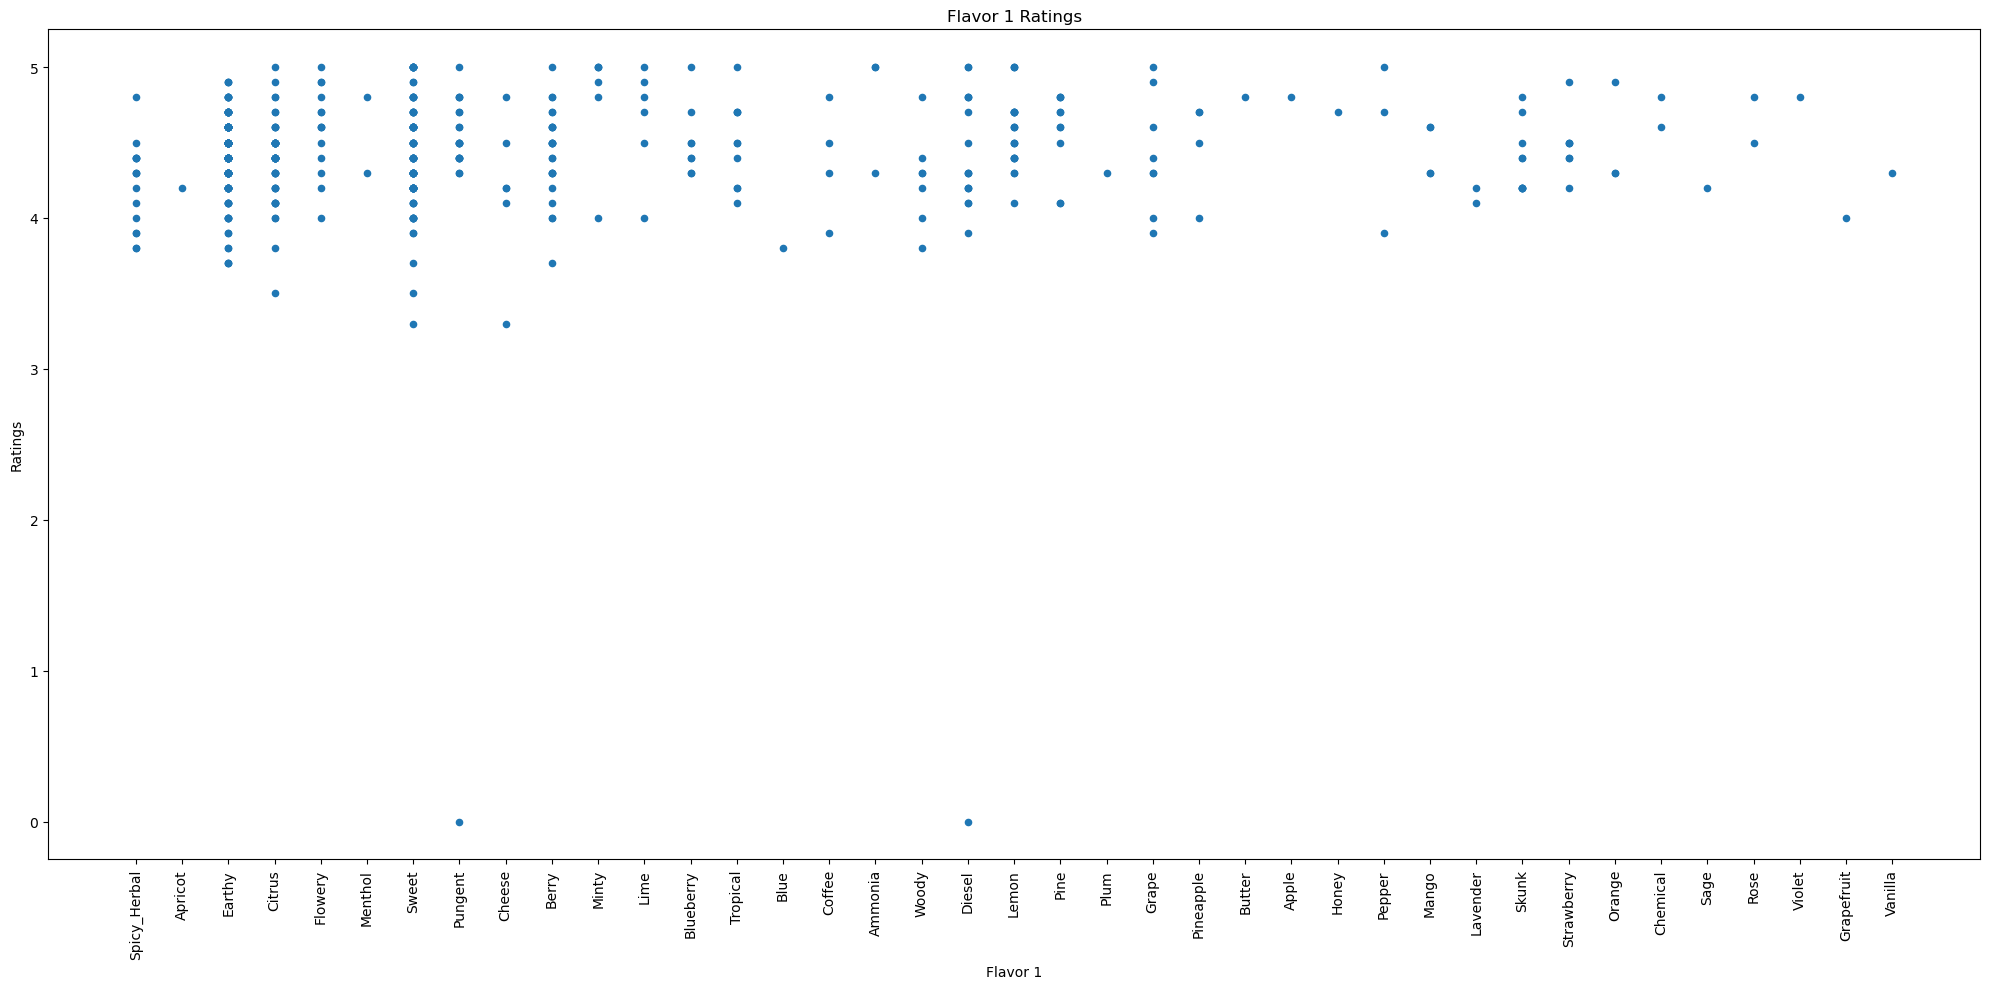

In [150]:
# Create a Scatter Plot of flavor 1 vs rating
OD3.plot(kind = 'scatter', x = 'flavor_1', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 1 Ratings")
plt.xlabel("Flavor 1")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()



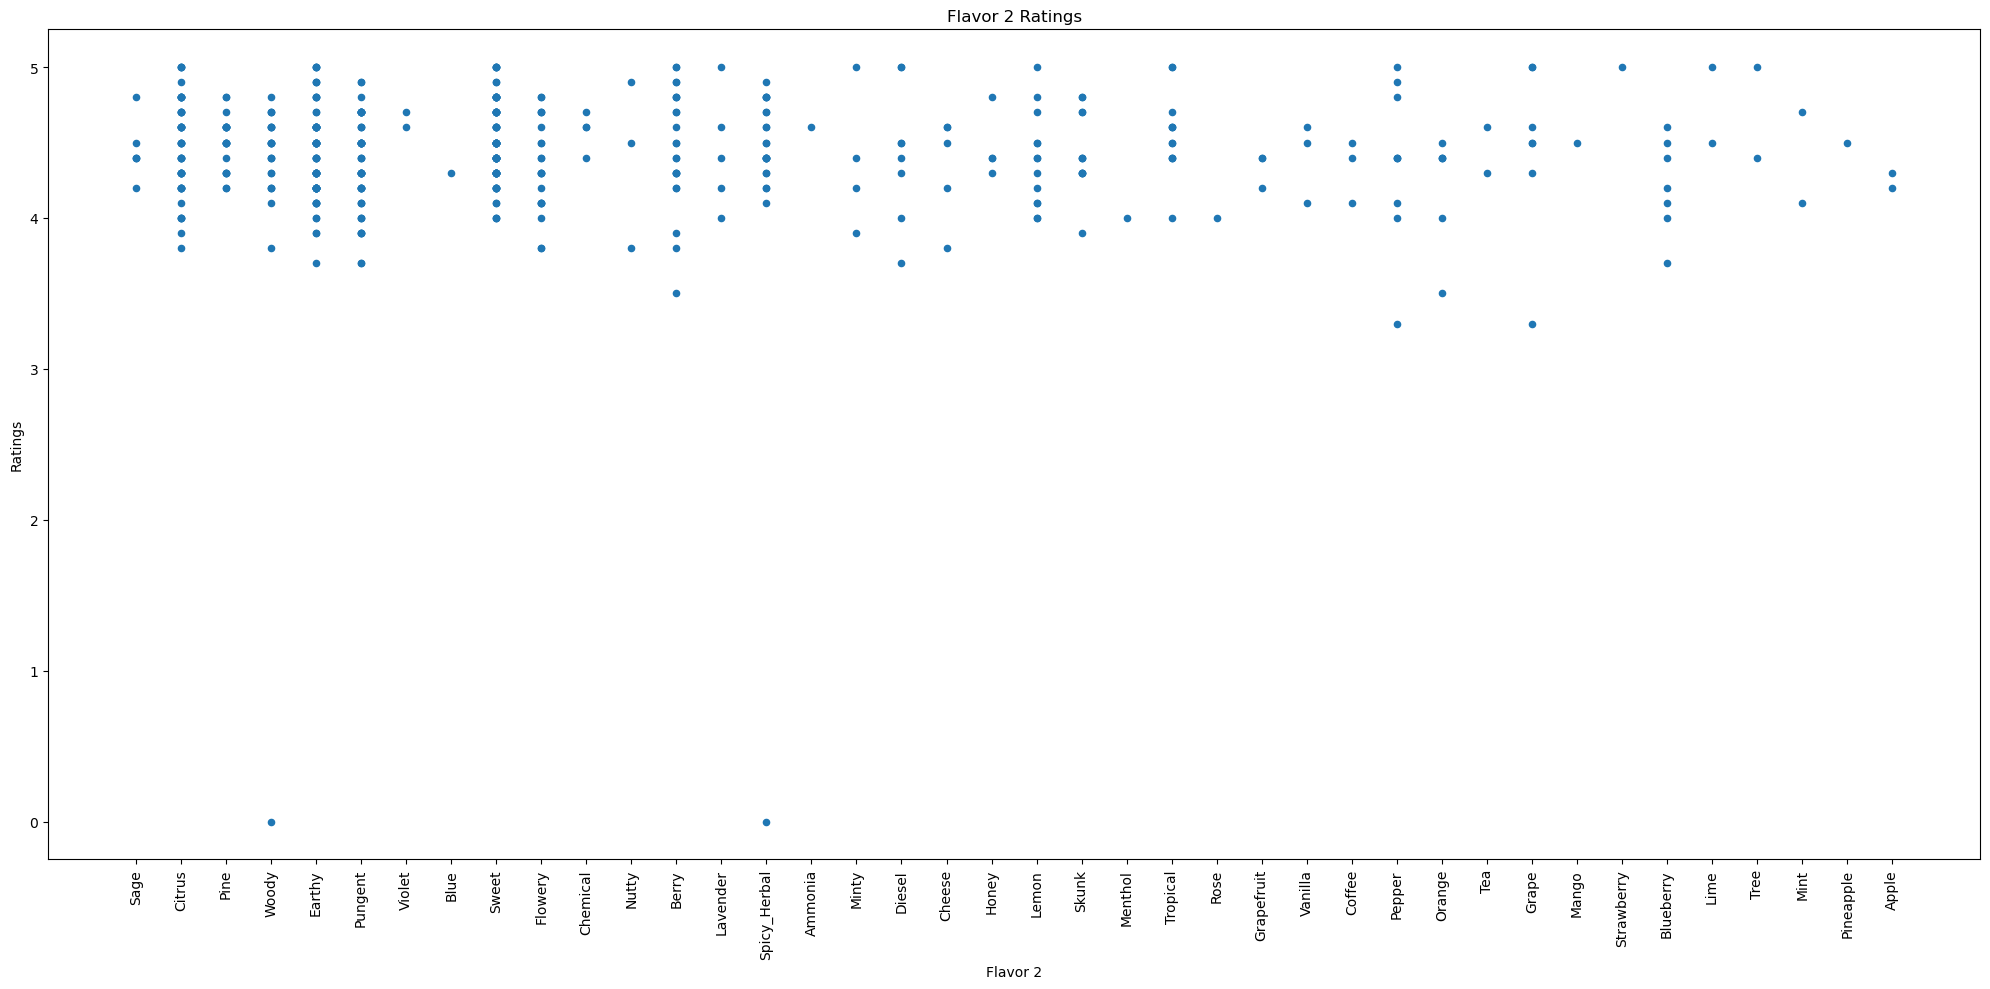

In [151]:
# Create a Scatter Plot of flavor 2 vs rating
OD3.plot(kind = 'scatter', x = 'flavor_2', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 2 Ratings")
plt.xlabel("Flavor 2")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()


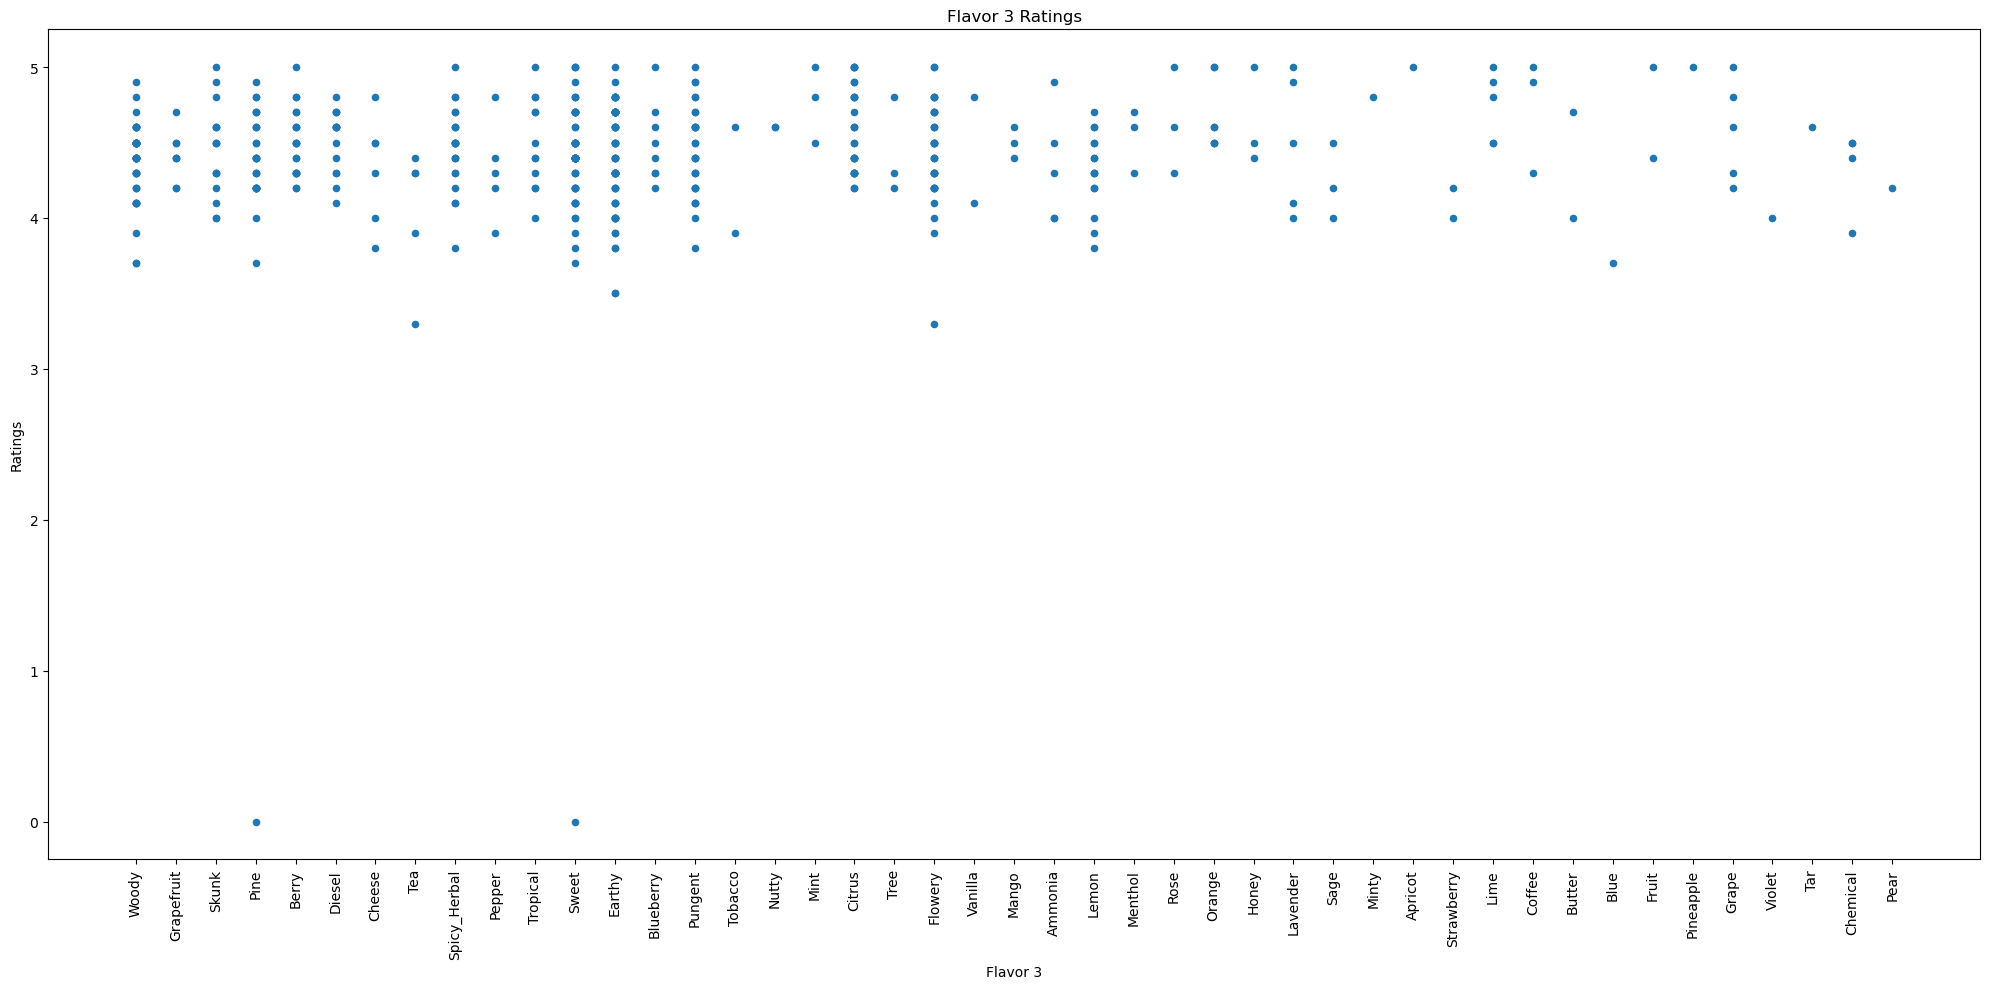

In [152]:
# Create a Scatter Plot of flavor 3 vs rating
OD3.plot(kind = 'scatter', x = 'flavor_3', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 3 Ratings")
plt.xlabel("Flavor 3")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()

In [156]:
per_flavor1_rating = OD3.groupby("flavor_1")
per_flavor1_rating = per_flavor1_rating["Rating"].mean()
per_flavor1_rating

flavor_1
Ammonia         4.766667
Apple           4.800000
Apricot         4.200000
Berry           4.436000
Blue            3.800000
Blueberry       4.512500
Butter          4.800000
Cheese          4.183333
Chemical        4.700000
Citrus          4.386275
Coffee          4.375000
Diesel          4.188235
Earthy          4.417187
Flowery         4.585714
Grape           4.425000
Grapefruit      4.000000
Honey           4.700000
Lavender        4.150000
Lemon           4.576190
Lime            4.650000
Mango           4.450000
Menthol         4.550000
Minty           4.783333
Orange          4.500000
Pepper          4.533333
Pine            4.570000
Pineapple       4.475000
Plum            4.300000
Pungent         4.338095
Rose            4.650000
Sage            4.200000
Skunk           4.380000
Spicy_Herbal    4.218750
Strawberry      4.485714
Sweet           4.427473
Tropical        4.500000
Vanilla         4.300000
Violet          4.800000
Woody           4.257143
Name: Rating, dt

In [153]:
#from scipy.stats import linregress

In [165]:
# #Perform a linear regression on flavor_1 vs. rating mean
# x = ["per_flavor1_rating"]
# y = OD3["Rating"]

# x = x.astype(float)
# y = y.astype(float)


# res = st.linregress(x, y)
# print(f"R-squared: {res.rvalue**2:.6f}")

# plt.plot(x, y, 'o', label='original data')
# plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
# plt.legend()
# plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # make plot
# plt.scatter(x,y)
# plt.plot(x,regress_values,"r-")
# plt.annotate(line_eq,(20, 35),fontsize=12,color="blue")
# plt.xlabel('Flavor 1')
# plt.ylabel('Rating')

# corr = OD3.corr(method='pearson')["Flavor 1"]["Rating"]
# print(f"The correlation is {corr}")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

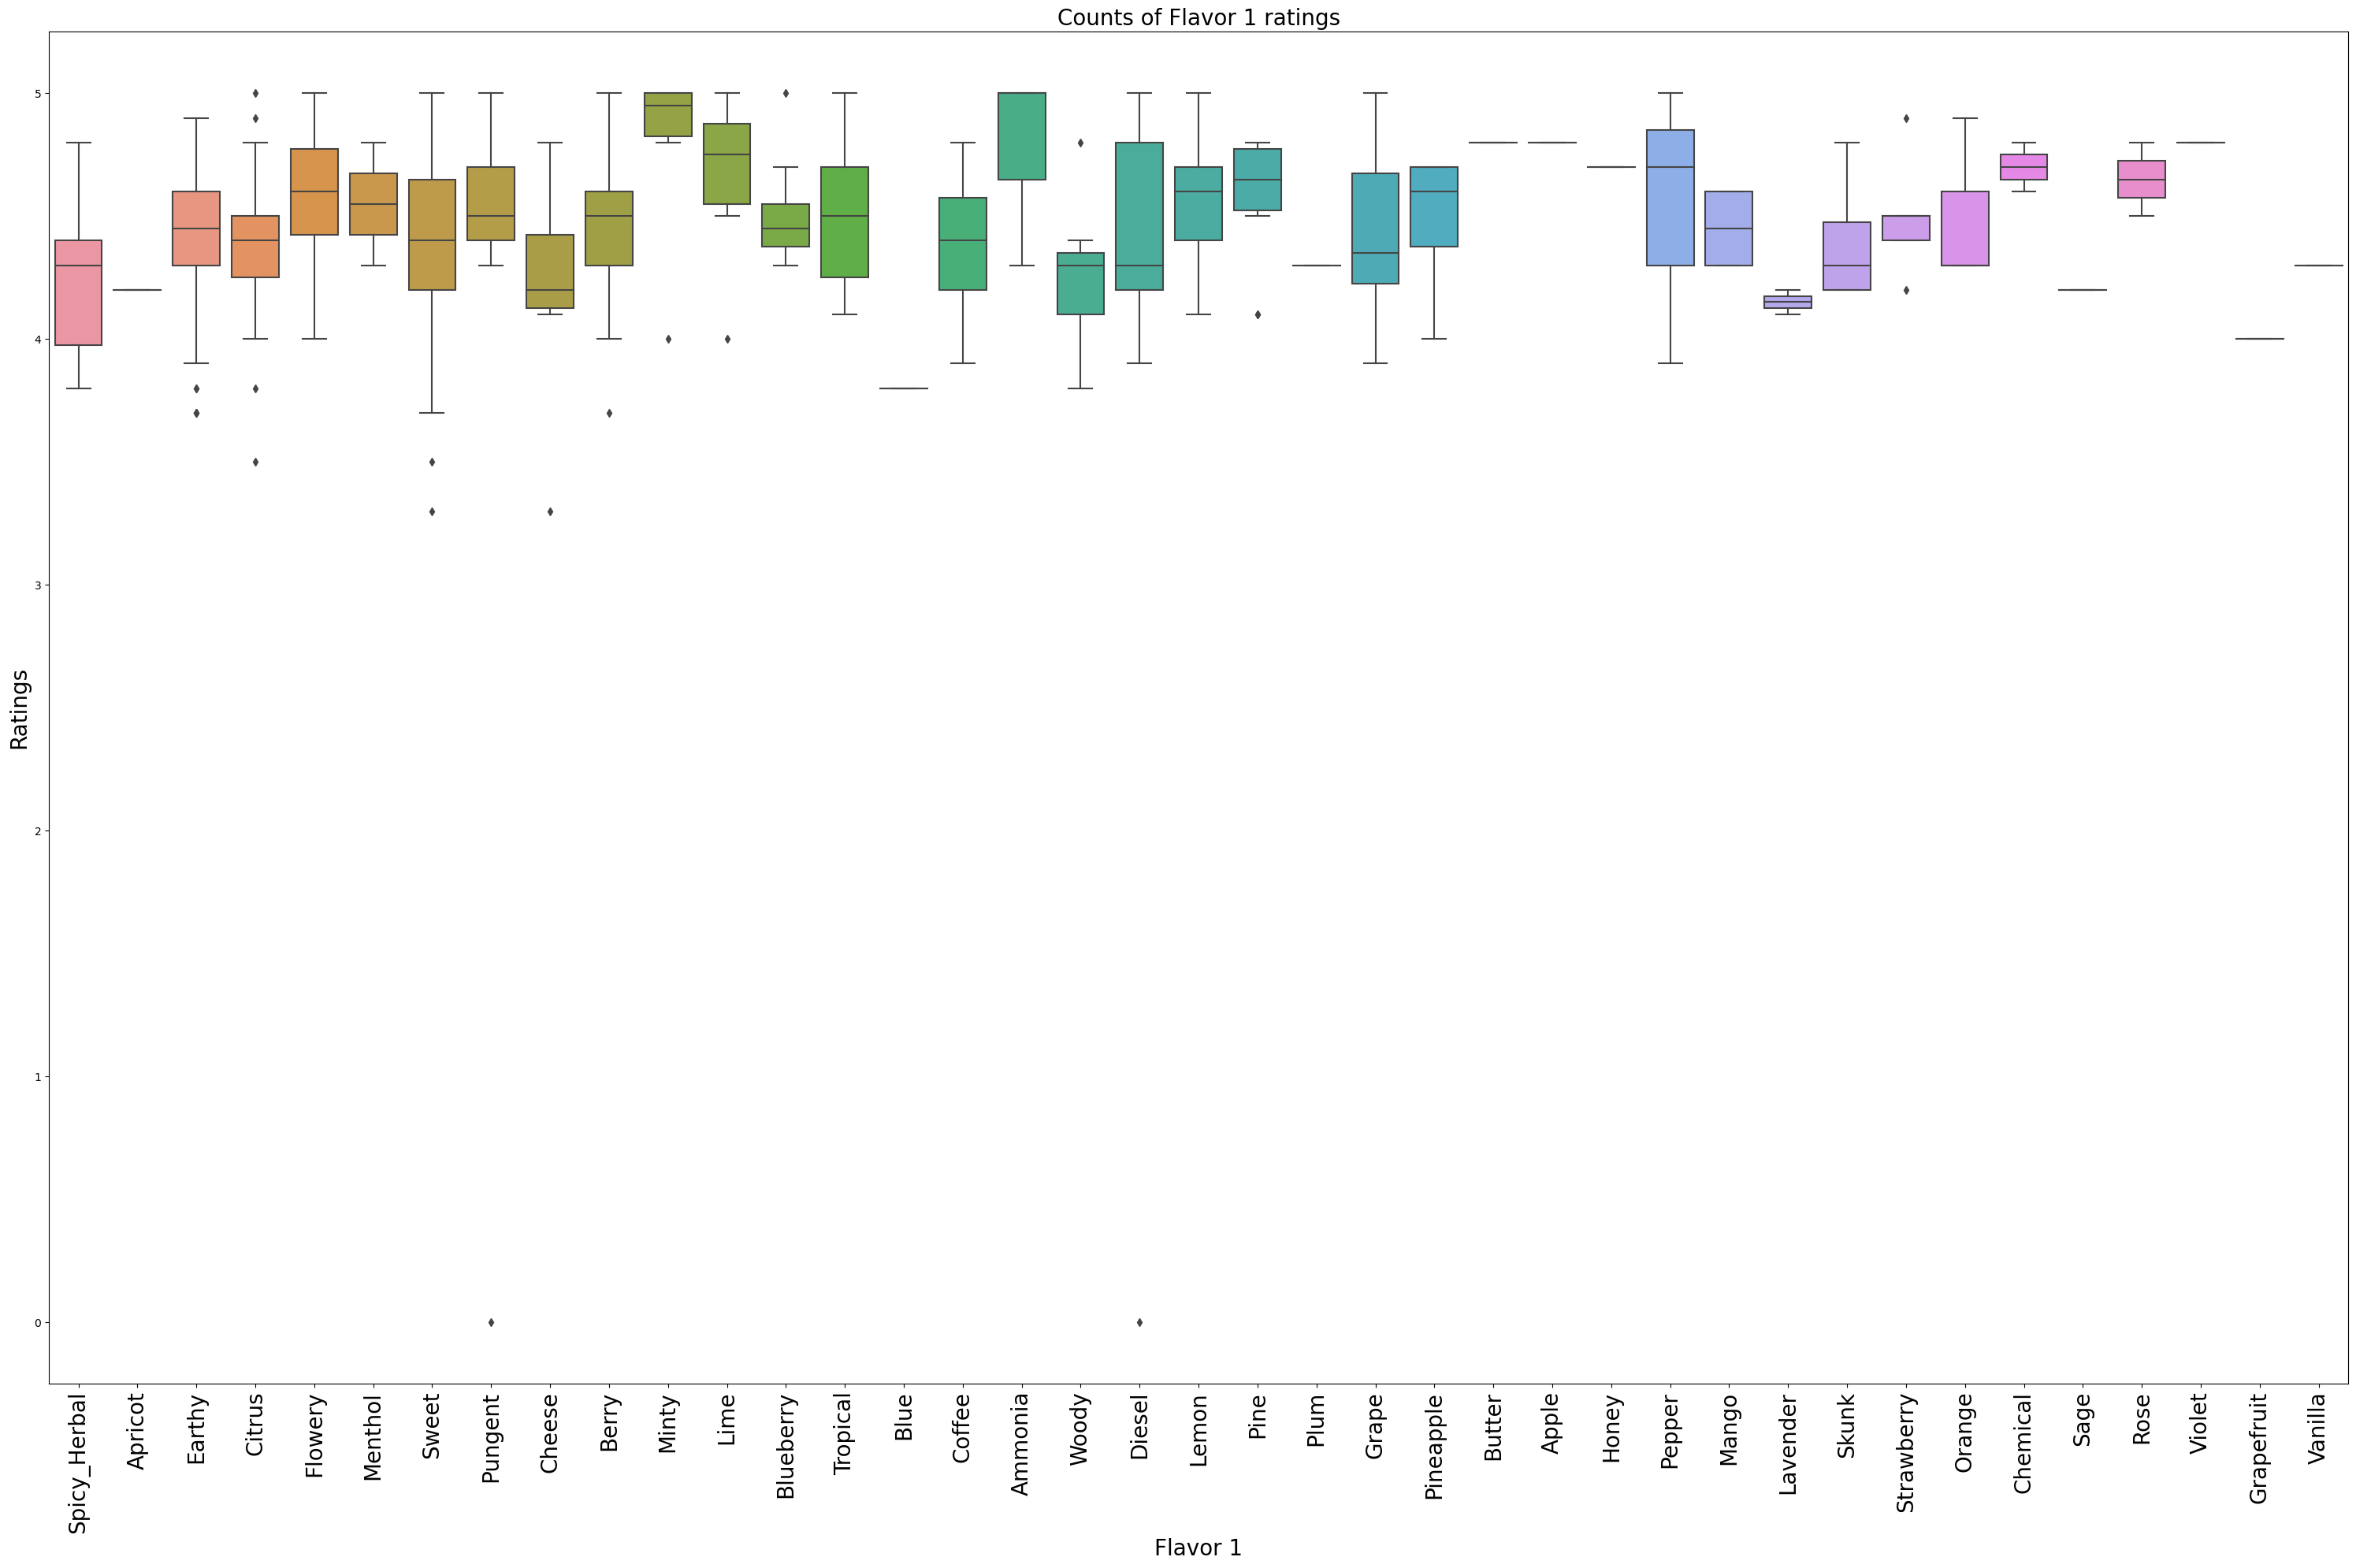

In [182]:
#Create a box plot with flavors and ratings
plt.figure(figsize=(30,20))
box_plot_f1 = sns.boxplot(data=OD3,x="flavor_1",y="Rating")
box_plot_f1.set_xticklabels(box_plot_f1.get_xticklabels(), rotation=90, fontsize=20)
plt.title("Counts of Flavor 1 ratings", fontsize=20)
plt.xlabel("Flavor 1", fontsize=20)
plt.ylabel("Ratings", fontsize=20)
plt.tight_layout()
plt.show()

In [118]:
per_flavor2_rating = OD3.groupby("flavor_2")
per_flavor2_rating = per_flavor2_rating["Rating"].mean()
per_flavor2_rating

flavor_2
Ammonia         4.600000
Apple           4.250000
Berry           4.469565
Blue            4.300000
Blueberry       4.214286
Cheese          4.340000
Chemical        4.575000
Citrus          4.477778
Coffee          4.333333
Diesel          4.425000
Earthy          4.424286
Flowery         4.340909
Grape           4.457143
Grapefruit      4.333333
Honey           4.475000
Lavender        4.440000
Lemon           4.384615
Lime            4.750000
Mango           4.500000
Menthol         4.000000
Mint            4.400000
Minty           4.375000
Nutty           4.400000
Orange          4.200000
Pepper          4.366667
Pine            4.500000
Pineapple       4.500000
Pungent         4.364151
Rose            4.000000
Sage            4.450000
Skunk           4.441667
Spicy/Herbal    4.313043
Strawberry      5.000000
Sweet           4.513158
Tea             4.450000
Tree            4.700000
Tropical        4.558333
Vanilla         4.400000
Violet          4.650000
Woody           

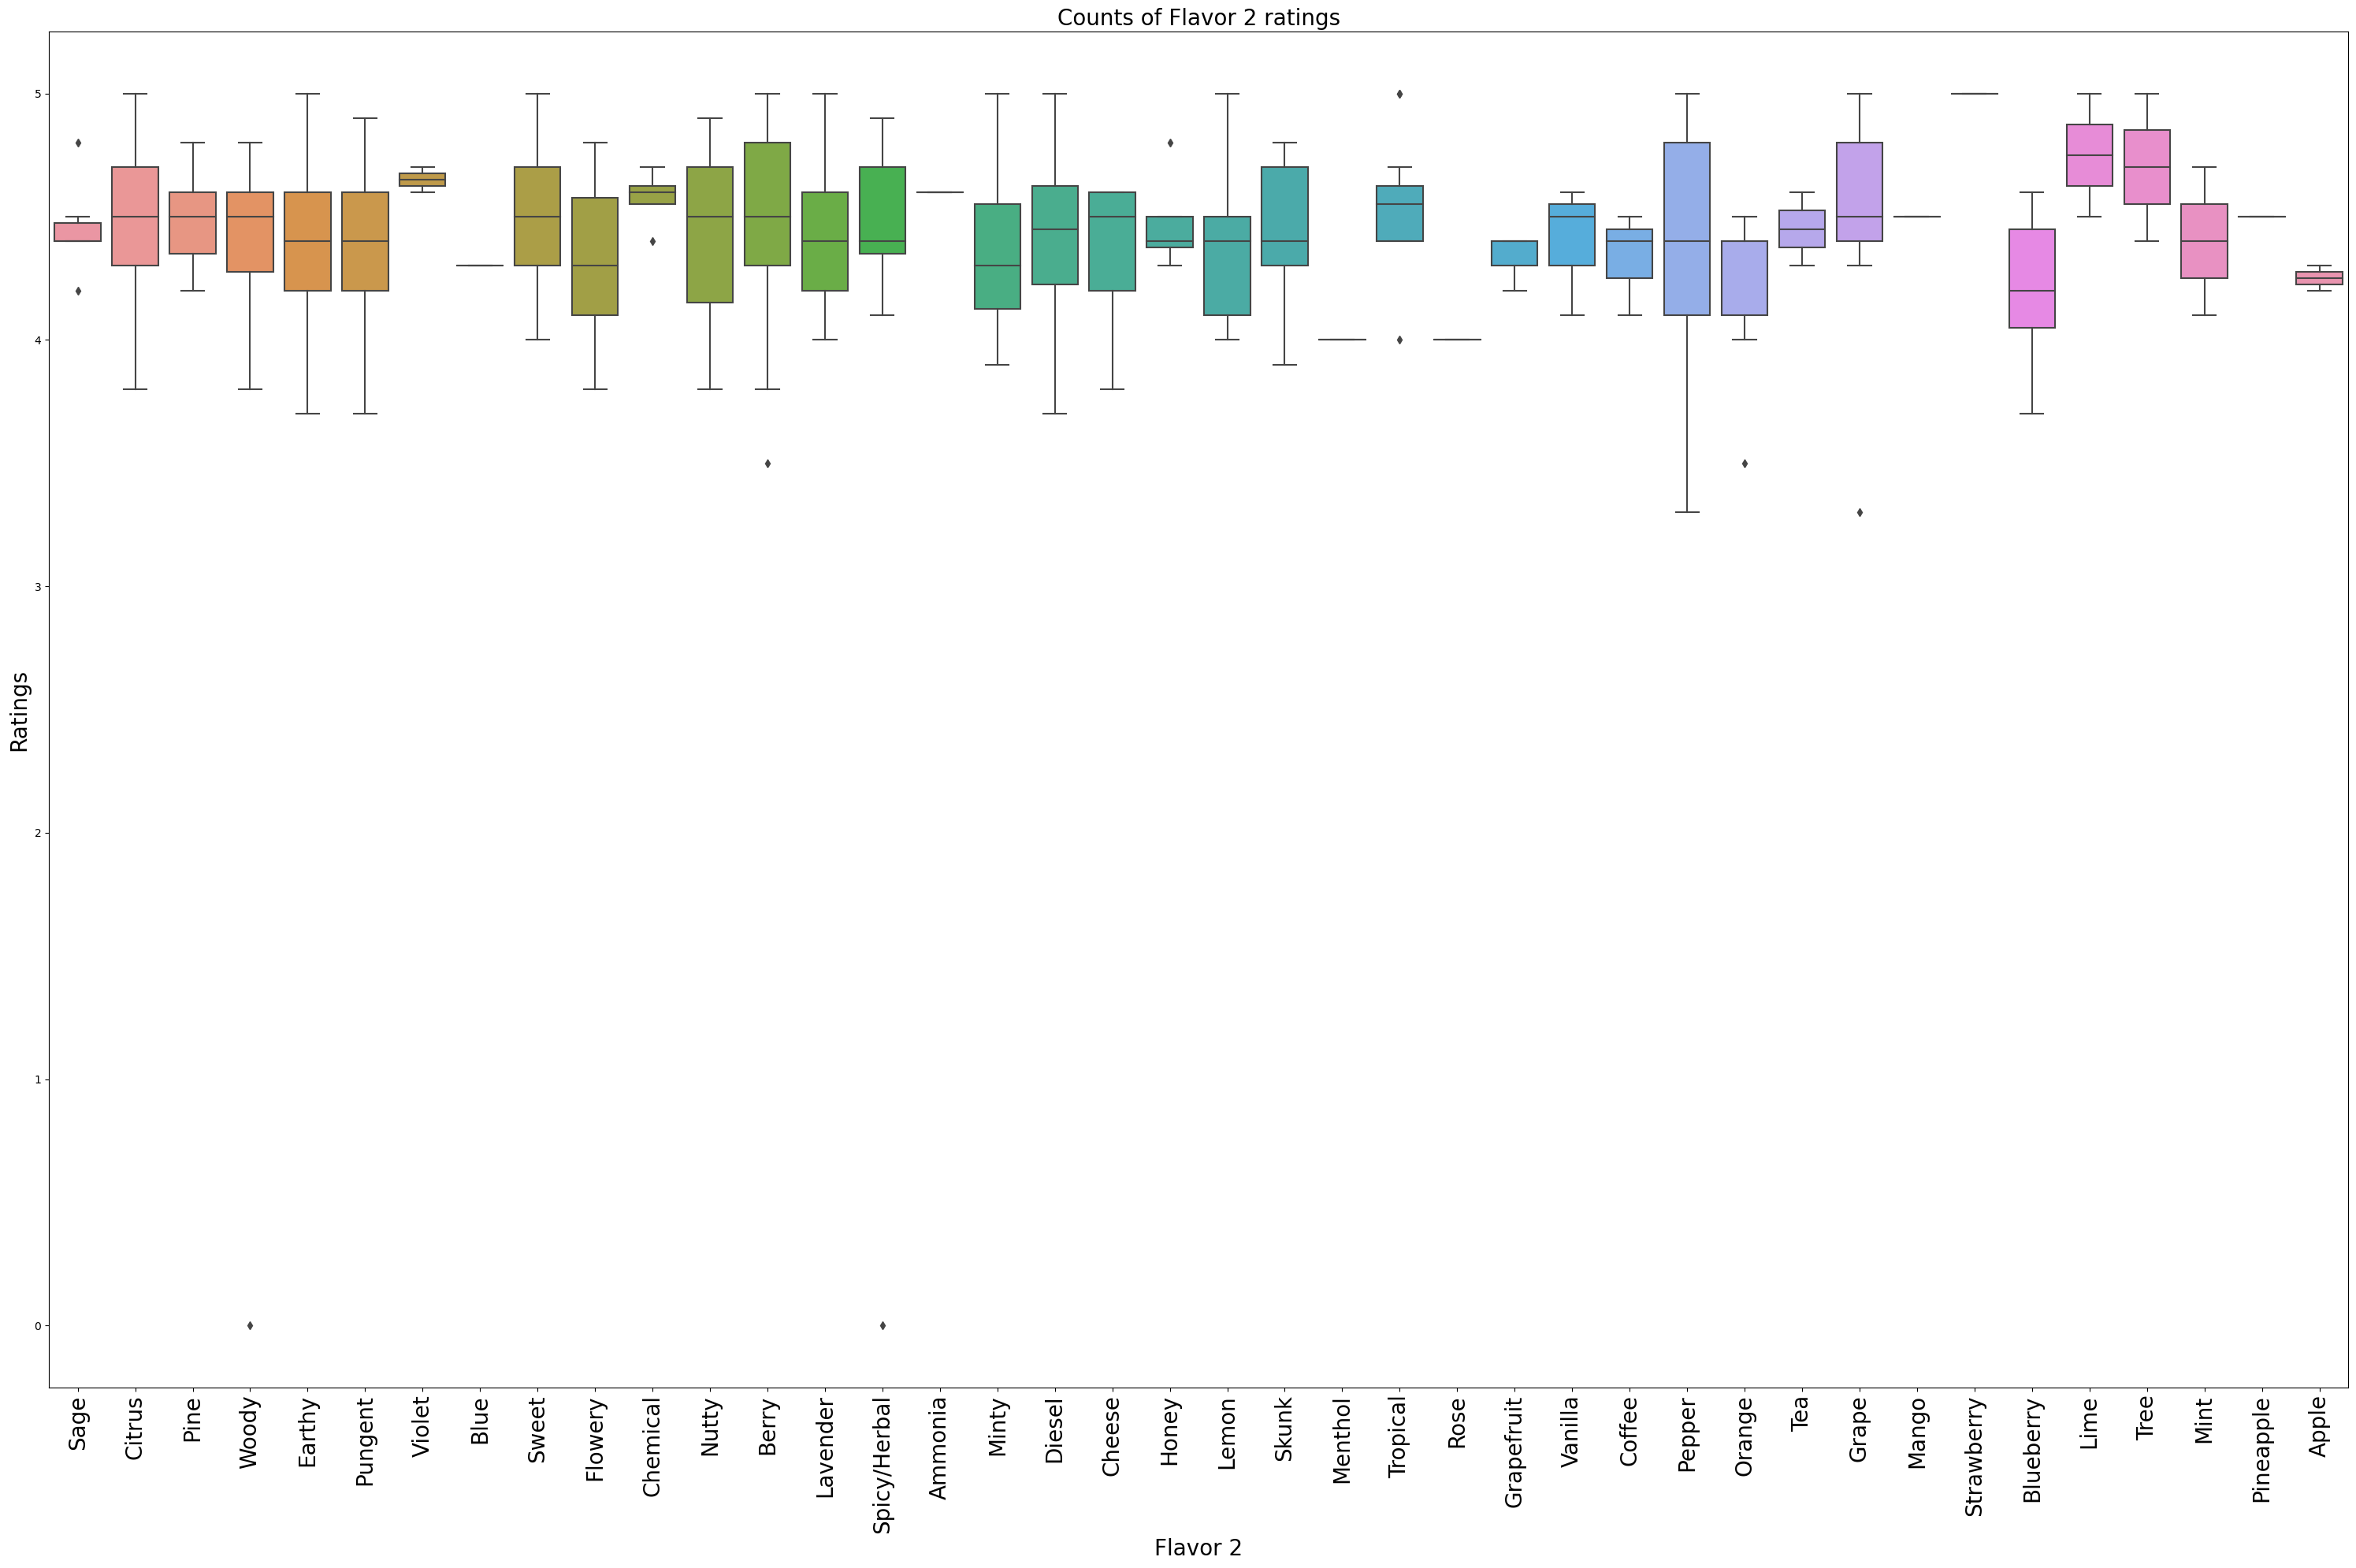

In [121]:
#Create a box plot with flavors and ratings
plt.figure(figsize=(30,20))
box_plot_f2 = sns.boxplot(data=OD3,x="flavor_2",y="Rating")
box_plot_f2.set_xticklabels(box_plot_f2.get_xticklabels(), rotation=90, fontsize=20)
plt.title("Counts of Flavor 2 ratings", fontsize=20)
plt.xlabel("Flavor 2", fontsize=20)
plt.ylabel("Ratings", fontsize=20)
plt.tight_layout()
plt.show()

In [122]:
per_flavor3_rating = OD3.groupby("flavor_3")
per_flavor3_rating = per_flavor3_rating["Rating"].mean()
per_flavor3_rating

flavor_3
Ammonia         4.340000
Apricot         5.000000
Berry           4.500000
Blue            3.700000
Blueberry       4.500000
Butter          4.350000
Cheese          4.316667
Chemical        4.325000
Citrus          4.575862
Coffee          4.733333
Diesel          4.513333
Earthy          4.392424
Flowery         4.437143
Fruit           4.700000
Grape           4.580000
Grapefruit      4.412500
Honey           4.633333
Lavender        4.500000
Lemon           4.313333
Lime            4.740000
Mango           4.500000
Menthol         4.533333
Mint            4.766667
Minty           4.800000
Nutty           4.600000
Orange          4.671429
Pear            4.200000
Pepper          4.320000
Pine            4.255172
Pineapple       5.000000
Pungent         4.440000
Rose            4.633333
Sage            4.233333
Skunk           4.450000
Spicy/Herbal    4.469565
Strawberry      4.100000
Sweet           4.350847
Tar             4.600000
Tea             4.040000
Tobacco         

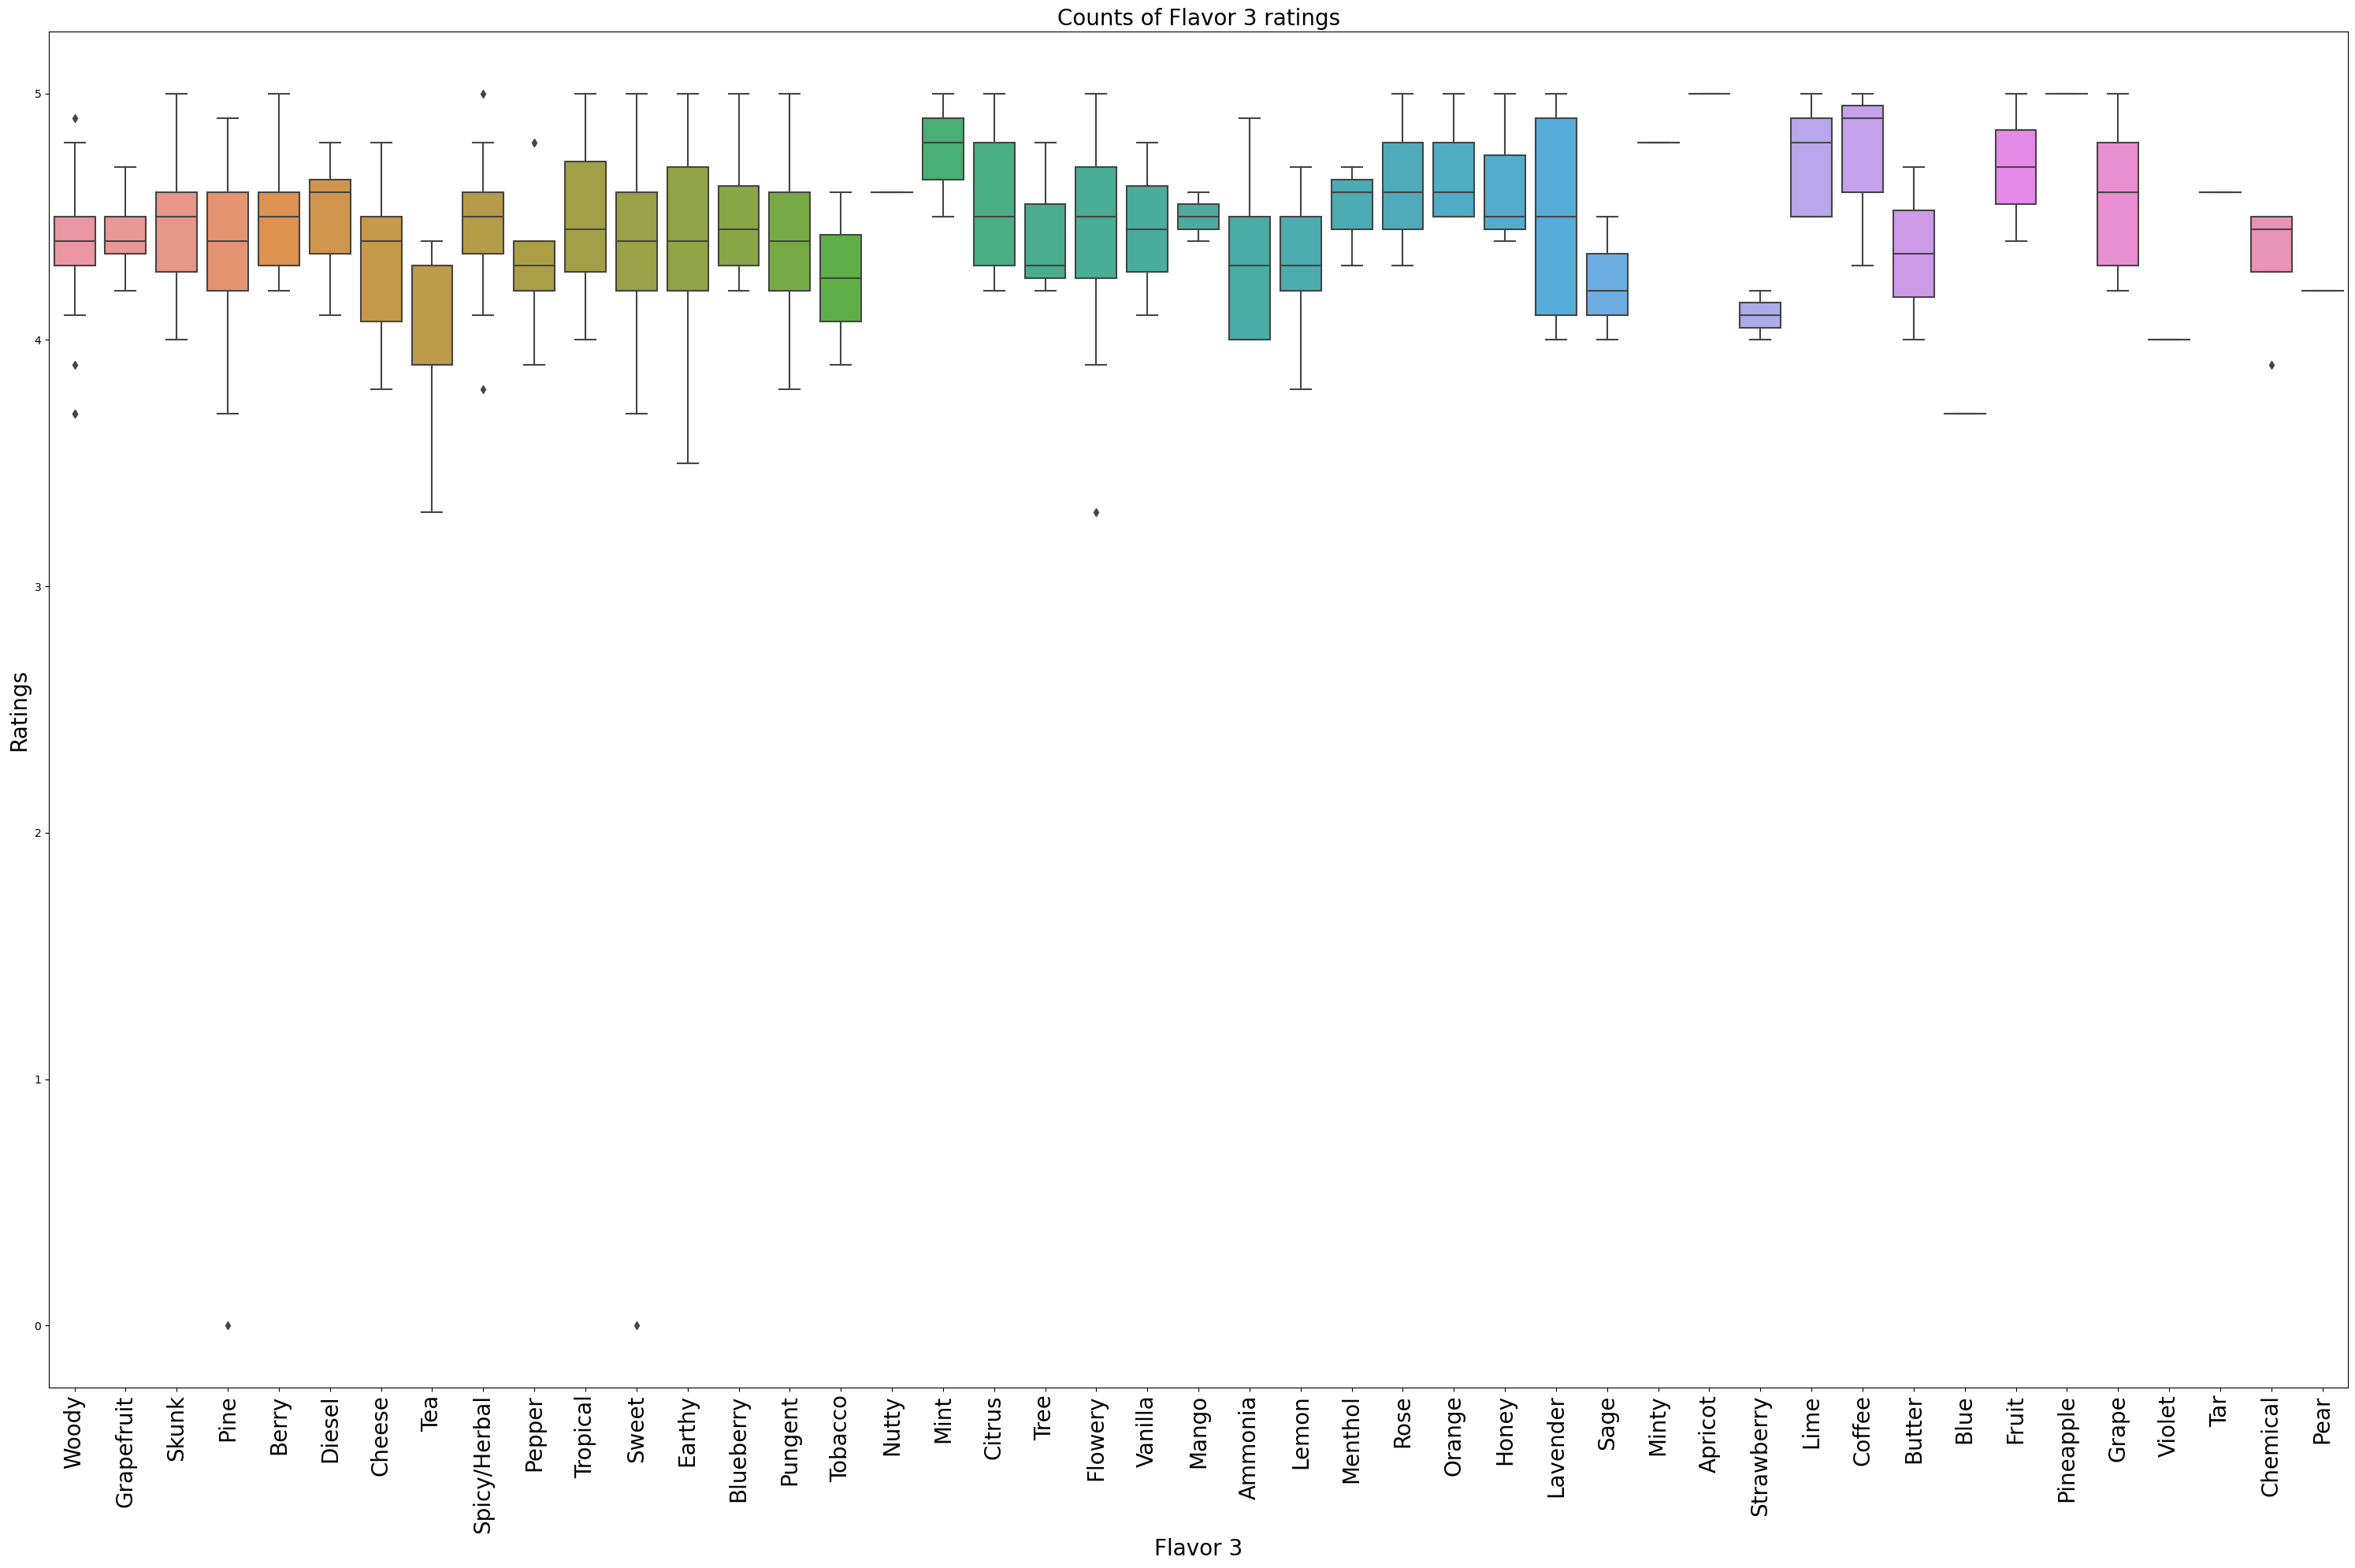

In [123]:
#Create a box plot with flavors and ratings
plt.figure(figsize=(30,20))
box_plot_f3 = sns.boxplot(data=OD3,x="flavor_3",y="Rating")
box_plot_f3.set_xticklabels(box_plot_f3.get_xticklabels(), rotation=90, fontsize=20)
plt.title("Counts of Flavor 3 ratings", fontsize=20)
plt.xlabel("Flavor 3", fontsize=20)
plt.ylabel("Ratings", fontsize=20)
plt.tight_layout()
plt.show()

In [116]:
#What Flavor has min rating?
#Based on the graphs it looks like pungent, diesel, woody, spicy/herbal, pine, and sweet
#Grouped data by ratings and aggregated the group by min rating
OD3.groupby('Rating').agg('min')

,Strain,Type,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,num_effects,num_flavors
Rating,,,,,,,,,,,,,,,,
0.0,Mc1,hybrid,"Hungry,Aroused,Tingly,Uplifted,Creative","Diesel,Spicy/Herbal,Sweet",TGA Subcool Genetics,"Seattle, Washington",Hungry,Aroused,Tingly,Creative,Creative,Diesel,Spicy/Herbal,Pine,5.0,3.0
3.3,Cheeseburger,hybrid,"Talkative,Creative,Euphoric,Happy,Hungry","Cheese,Pepper,Tea",Cannasol Farms,Canada,Talkative,Creative,Euphoric,Aroused,Creative,Cheese,Grape,Flowery,5.0,3.0
3.5,Golden-Tangie,hybrid,"Focused,Happy,Aroused,Energetic,Tingly","Citrus,Orange,Earthy",Calyx Garden,"Humboldt, California",Focused,Happy,Aroused,Creative,Energetic,Citrus,Berry,Earthy,5.0,3.0
3.7,Bakerstreet,hybrid,"Aroused,Tingly,Uplifted,Creative,Euphoric","Berry,Blueberry,Blue,Cheese","Canadian LP Tweed, Inc",Arizona,Aroused,Giggly,Creative,Creative,Euphoric,Berry,Blueberry,Blue,5.0,3.0
3.8,Alien-Abduction,hybrid,"Euphoric,Happy,Hungry,Talkative,Energetic","Blue,Cheese,Cheese,Pungent",Ace Seeds,Africa,Euphoric,Happy,Creative,Aroused,Creative,Blue,Berry,Cheese,5.0,3.0
3.9,African,hybrid,"Energetic,Happy,Creative,Uplifted,Euphoric","Coffee,Berry,Flowery",Buddha Seeds,Africa,Energetic,Energetic,Aroused,Euphoric,Creative,Coffee,Berry,Chemical,5.0,3.0
4.0,Big-Holy-Nina,hybrid,"Creative,Tingly,Euphoric,Hungry,Uplifted","Berry,Pungent,Sweet",Apothecary Genetics,"Afghanistan, Hawaii and Nepal",Creative,Aroused,Aroused,Creative,Creative,Berry,Blueberry,Ammonia,5.0,3.0
4.1,Ace-Of-Spades,hybrid,"Energetic,Focused,Relaxed,Talkative,Tingly","Berry,Woody,Earthy",Alien Genetics,"Amsterdam, Netherlands",Energetic,Energetic,Euphoric,Aroused,Aroused,Berry,Blueberry,Diesel,5.0,3.0
4.2,13-Dawgs,hybrid,"Creative,Euphoric,Tingly,Uplifted,Energetic","Apricot,Citrus,Grapefruit",Ace Seeds,"Afghanistan, Hawaii and Nepal",Creative,Creative,Creative,Creative,Creative,Apricot,Apple,Berry,5.0,3.0


In [117]:
#What Flavor has max rating?
#Looks like strawbeery, pineapple, apple, butter, violet
#Grouped data by ratings and aggregated the group by max rating
OD3.groupby('Rating').agg('max')

,Strain,Type,Effects,Flavor,Breeders,LOCATION,effect_1,effect_2,effect_3,effect_4,effect_5,flavor_1,flavor_2,flavor_3,num_effects,num_flavors
Rating,,,,,,,,,,,,,,,,
0.0,The-Wills,hybrid,"Talkative,Tingly,Uplifted,Creative,Euphoric","Pungent,Woody,Pine",Unknown,Washington,Talkative,Tingly,Uplifted,Uplifted,Euphoric,Pungent,Woody,Sweet,5.0,3.0
3.3,Lethal-Purple,hybrid,"Tingly,Uplifted,Relaxed,Aroused,Creative","Sweet,Grape,Flowery",Great White North Seeds,"Omak, Washington",Tingly,Uplifted,Relaxed,Happy,Hungry,Sweet,Pepper,Tea,5.0,3.0
3.5,Purple-Goat,sativa,"Uplifted,Happy,Talkative,Creative,Energetic","Sweet,Berry,Earthy",Oregon OMMP,Oregon,Uplifted,Happy,Talkative,Energetic,Tingly,Sweet,Orange,Earthy,5.0,3.0
3.7,Malakoff,sativa,"Relaxed,Happy,Talkative,Uplifted,Focused","Sweet,Earthy,Woody",Medical Seeds Co,Spain,Relaxed,Tingly,Uplifted,Uplifted,Uplifted,Sweet,Pungent,Woody,5.0,4.0
3.8,Wild-Thailand,sativa,"Relaxed,Sleepy,Hungry,Aroused,Uplifted","Woody,Flowery,Earthy",World of Seeds Bank,"Valencia, Spain",Relaxed,Talkative,Sleepy,Uplifted,Uplifted,Woody,Woody,Sweet,5.0,4.0
3.9,Sweet-Nina,sativa,"Talkative,Happy,Uplifted,Focused,Energetic","Sweet,Minty,Earthy",Unknown,Washington,Talkative,Uplifted,Uplifted,Uplifted,Uplifted,Sweet,Skunk,Woody,5.0,3.0
4.0,Waldo,sativa,"Talkative,Uplifted,Euphoric,Happy,Relaxed","Woody,Sweet,Earthy",THSeeds,"Tacoma, Washington",Talkative,Uplifted,Uplifted,Uplifted,Uplifted,Woody,Tropical,Violet,5.0,3.0
4.1,Super-Bud,sativa,"Uplifted,Happy,Relaxed,Tingly,Energetic","Tropical,Pungent,Sweet",White Label Seed Company,"Valencia, Spain",Uplifted,Uplifted,Uplifted,Uplifted,Uplifted,Tropical,Woody,Woody,5.0,3.0
4.2,Yummy,sativa,"Uplifted,Relaxed,Happy,Sleepy,Creative","Woody,Earthy,Tropical",World of Seeds Bank,Washington State,Uplifted,Uplifted,Uplifted,Uplifted,Uplifted,Woody,Woody,Woody,5.0,4.0


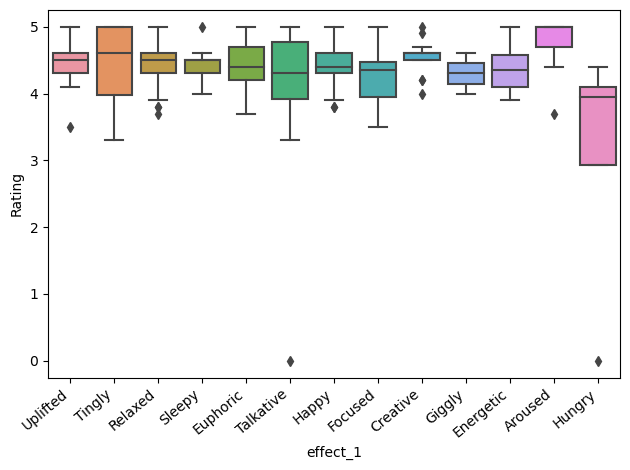

In [43]:
#Create a Box plot to see if ratings vary depending on the effect (using effect 1)

box_plot_e1=sns.boxplot(data=OD3,x="effect_1",y="Rating")
box_plot_e1.set_xticklabels(box_plot_e1.get_xticklabels(), rotation=40,ha="right")
plt.tight_layout()

plt.show()

In [ ]:
#df3.to_csv("MaryJane_clean_data.csv", index=False)